**vgg 19**

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import pandas as pd
import os
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from glob import glob

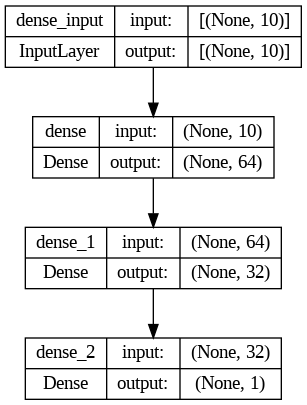

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import plot_model
from graphviz import Digraph

# Load the VGG19 model
model = VGG19()

# Plot the model architecture
plot_model(model, to_file='vgg19.png', show_shapes=True)

# Alternatively, you can also use Graphviz to plot the model architecture
dot = Digraph()

# Add nodes to the graph
for i, layer in enumerate(model.layers):
    dot.node(str(i), label=layer.name)

# Add edges to the graph
for layer in model.layers:
    for node in layer._inbound_nodes:
        for input_tensor in node.input_tensors:
            inbound_layer = input_tensor.op.name.split('/')[0]
            dot.edge(str(model.get_layer(inbound_layer).output.name), str(layer.name))

# Save and display the graph
dot.render('vgg19_graph', format='png')

574710816/574710816 [==============================] - 3s 0us/step


TypeError: ignored

In [ ]:
# Set the directory for the dataset
base_dir = '/content/drive/My Drive/Dataset'

# Preprocessing
IMAGE_SIZE = 256
BATCH_SIZE = 32
def preprocess_image(img):
    img = img.astype(np.float32) / 255.0
    img -= np.mean(img, axis=0)
    return img

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_image,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_image,
    validation_split=0.1)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation')

Found 3816 images belonging to 4 classes.
Found 421 images belonging to 4 classes.


In [ ]:
# Load the VGG19 model
IMAGE_SIZE = [256, 256]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights="imagenet", include_top=False)
for layer in vgg.layers:
    layer.trainable = False

folders = glob("/content/drive/My Drive/Dataset/*")
print(len(folders))
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

80134624/80134624 [==============================] - 0s 0us/step
4
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                            

In [ ]:
# Train the model
epochs = 9
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator))

Epoch 1/9
120/120 [==============================] - 762s 6s/step - loss: 1.0428 - accuracy: 0.6716 - val_loss: 1.3093 - val_accuracy: 0.5629
Epoch 2/9
120/120 [==============================] - 95s 786ms/step - loss: 0.5564 - accuracy: 0.7825 - val_loss: 0.7621 - val_accuracy: 0.6722
Epoch 3/9
120/120 [==============================] - 94s 786ms/step - loss: 0.4787 - accuracy: 0.8116 - val_loss: 1.0050 - val_accuracy: 0.6200
Epoch 4/9
120/120 [==============================] - 95s 789ms/step - loss: 0.4316 - accuracy: 0.8333 - val_loss: 0.6283 - val_accuracy: 0.7720
Epoch 5/9
120/120 [==============================] - 95s 790ms/step - loss: 0.4677 - accuracy: 0.8179 - val_loss: 1.1713 - val_accuracy: 0.5843
Epoch 6/9
120/120 [==============================] - 94s 779ms/step - loss: 0.4487 - accuracy: 0.8352 - val_loss: 1.0332 - val_accuracy: 0.6627
Epoch 7/9
120/120 [==============================] - 94s 780ms/step - loss: 0.4369 - accuracy: 0.8341 - val_loss: 0.9505 - val_accuracy: 0

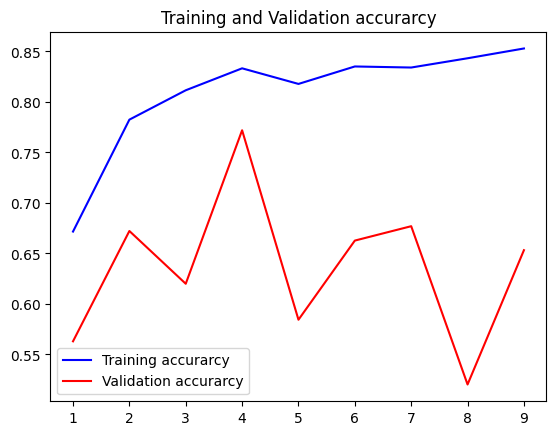

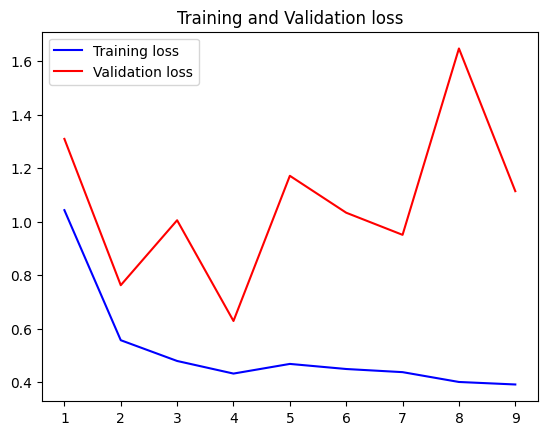

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [ ]:
print(val_accuracy)

[0.5629453659057617, 0.6722090244293213, 0.6199524998664856, 0.7719715237617493, 0.5843230485916138, 0.6627078652381897, 0.6769596338272095, 0.5201900005340576, 0.6532066464424133]


In [ ]:
np.mean(accuracy)

0.8091660804218717

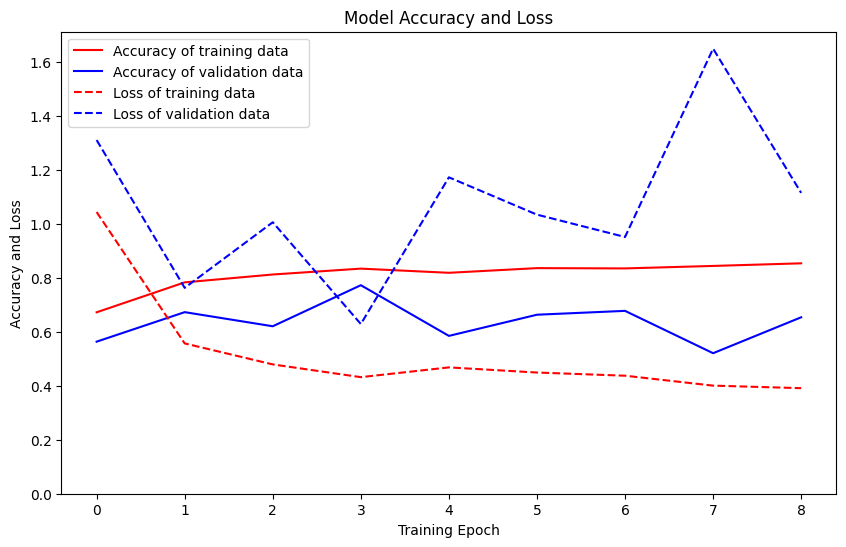

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()



In [ ]:
test_dir = '/content/drive/My Drive/Dataset'

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical')


Found 4237 images belonging to 4 classes.


In [ ]:
# Define x_test and y_test
x_test, y_test = validation_generator.next()

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.352370262145996
Test accuracy: 0.5625


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.352370262145996
Test accuracy: 0.5625


In [ ]:
testpred = model.predict(x_test)

1/1 [==============================] - 0s 191ms/step


In [ ]:
LABELS = ['normal', 'cataract', 'glaucoma', 'diabetic_retinopathy']

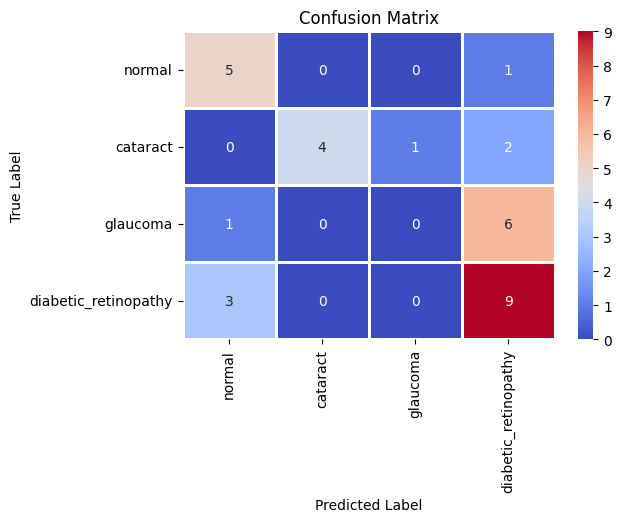

              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       1.00      0.57      0.73         7
           2       0.00      0.00      0.00         7
           3       0.50      0.75      0.60        12

    accuracy                           0.56        32
   macro avg       0.51      0.54      0.50        32
weighted avg       0.51      0.56      0.51        32



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
import seaborn as sns


def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

#y_pred_test = model.predict(X_train)
# Take the class with the highest probability from the test predictions
#max_y_pred_test = np.argmax(y_pred_test, axis=1)
#max_y_test = np.argmax(y_train_hot, axis=1)

rounded_predictions = np.argmax(testpred, axis=1)
rounded_labels=np.argmax(y_test, axis=1)


show_confusion_matrix(rounded_labels, rounded_predictions)
print(classification_report(rounded_labels, rounded_predictions))


In [ ]:
best_model_accuracy = val_accuracy[np.argmin(val_loss)]

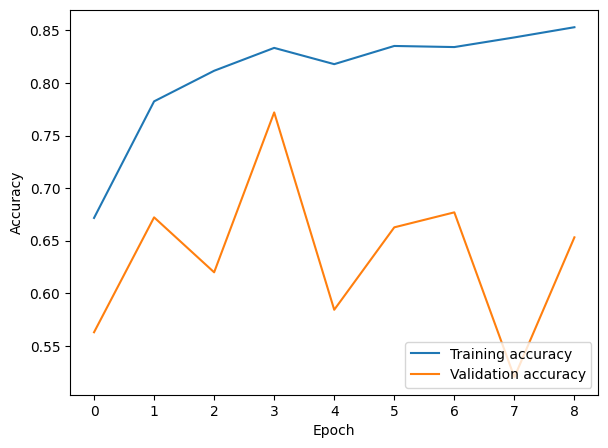

In [ ]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

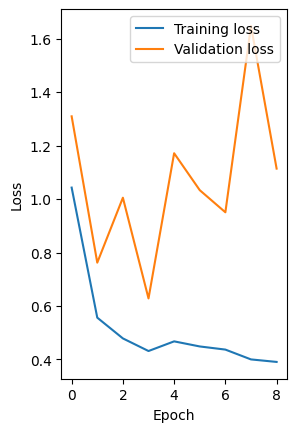

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


Mobilenet **V2**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from PIL import Image
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,precision_score,roc_curve,auc,recall_score,precision_score

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
WORK_DIR = '/content/drive/My Drive/Dataset/'

CLASSES = [ 'normal',
           'glaucoma',
           'diabetic_retinopathy',
           'cataract'
           ]

IMG=224

IMAGE_SIZE = [224, 224]
DIM = (IMG,IMG )

model_acc={}
model_val_acc={}

In [ ]:
ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=4237, shuffle=True)
# get image lables
labels =dict(zip([0,1,2,3], CLASSES))
# get a batch of images
train_data, train_labels = train_data_gen.next()

Found 4237 images belonging to 4 classes.


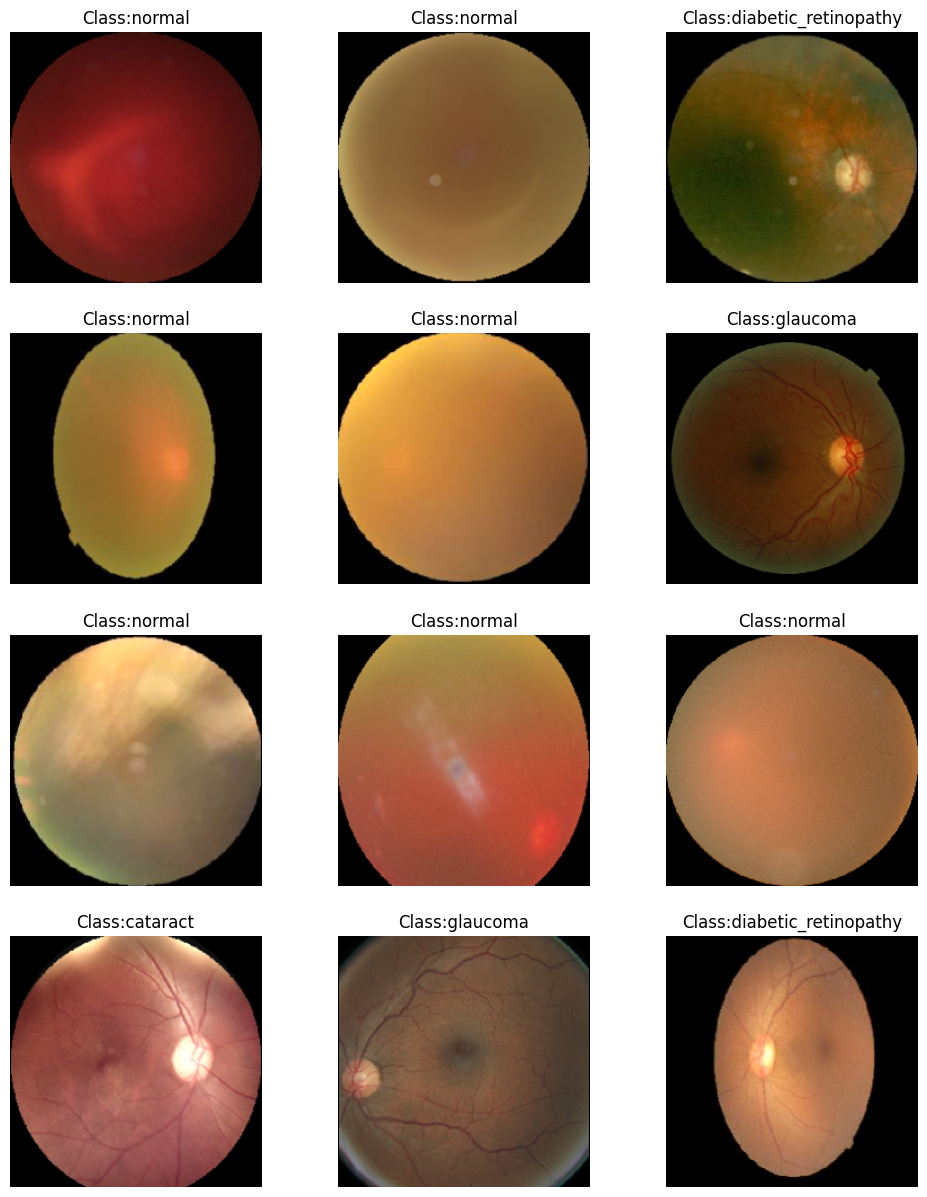

In [ ]:
from random import randint  
# display a grid of 9 images
plt.figure(figsize=(12, 15))
for i in range(12):
  ax = plt.subplot(4, 3, i + 1)
  idx = randint(0,4237)
  plt.imshow(train_data[idx])
  plt.axis("off")
  plt.title("Class:{}".format(labels[np.argmax(train_labels[idx])]))

In [ ]:
print(train_data.shape, train_labels.shape)

(4237, 224, 224, 3) (4237, 4)


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [ ]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
baseModel.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Define the number of classes
NUM_CLASSES = 4

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(NUM_CLASSES, activation="softmax")(headModel)

# Create the model
model_1 = Model(inputs=baseModel.input, outputs=headModel)

# Set the pre-trained layers to be non-trainable
for layer in baseModel.layers:
    layer.trainable = False

# Define the optimizer, loss function and metrics to be used
optimizer = Adam(lr=1e-4, decay=1e-4 / 20)
loss = CategoricalCrossentropy()
metrics = ["acc"]

# Compile the model
model_1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Print the model summary
model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                                                  
 block_8_depthwise_relu (ReLU)  (None, 14, 14, 384)  0           ['block_8_depthwise_BN[0][0]']   
                                                                                                  
 block_8_project (Conv2D)       (None, 14, 14, 64)   24576       ['block_8_depthwise_relu[0][0]'] 
                                                                                                  
 block_8_project_BN (BatchNorma  (None, 14, 14, 64)  256         ['block_8_project[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_8_add (Add)              (None, 14, 14, 64)   0           ['block_7_add[0][0]',            
                                                                  'block_8_project_BN[0][0]']     
          

In [ ]:
#Defining other parameters for our CNN model
model_1.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=["acc"])

model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
EPOCHS = 10
history1 = model_1.fit(train_data, train_labels, validation_data=(test_data, test_labels),batch_size=32, epochs=EPOCHS)

Epoch 1/10
106/106 [==============================] - 15s 92ms/step - loss: 0.9016 - acc: 0.6011 - val_loss: 0.5425 - val_acc: 0.7995
Epoch 2/10
106/106 [==============================] - 6s 58ms/step - loss: 0.6214 - acc: 0.7616 - val_loss: 0.4484 - val_acc: 0.8349
Epoch 3/10
106/106 [==============================] - 6s 55ms/step - loss: 0.5101 - acc: 0.8120 - val_loss: 0.4266 - val_acc: 0.8491
Epoch 4/10
106/106 [==============================] - 6s 58ms/step - loss: 0.4529 - acc: 0.8303 - val_loss: 0.3517 - val_acc: 0.8821
Epoch 5/10
106/106 [==============================] - 6s 55ms/step - loss: 0.4047 - acc: 0.8519 - val_loss: 0.3385 - val_acc: 0.8821
Epoch 6/10
106/106 [==============================] - 6s 55ms/step - loss: 0.3678 - acc: 0.8610 - val_loss: 0.3530 - val_acc: 0.8750
Epoch 7/10
106/106 [==============================] - 6s 57ms/step - loss: 0.3379 - acc: 0.8669 - val_loss: 0.3335 - val_acc: 0.8821
Epoch 8/10
106/106 [==============================] - 6s 56ms/step -

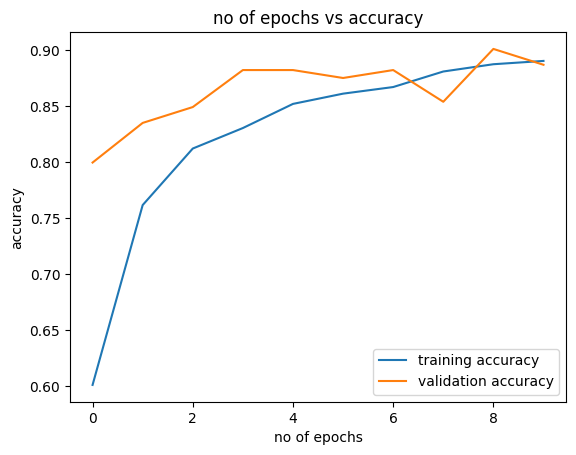

In [ ]:
acc=history.history['accuracy']
epochs_=range(0,EPOCHS)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history.history['val_accuracy']
plt.plot(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

In [ ]:
Train_acc1=history1.history['acc'][-1]
Val_acc1=history1.history['val_acc'][-1]

model_acc["MobileNet"]=Train_acc1
model_val_acc["MobileNet"]=Val_acc1
print("Train accuracy",Train_acc1)
print("Validation accuracy",Val_acc1)

Train accuracy 0.8902330994606018
Validation accuracy 0.8867924809455872


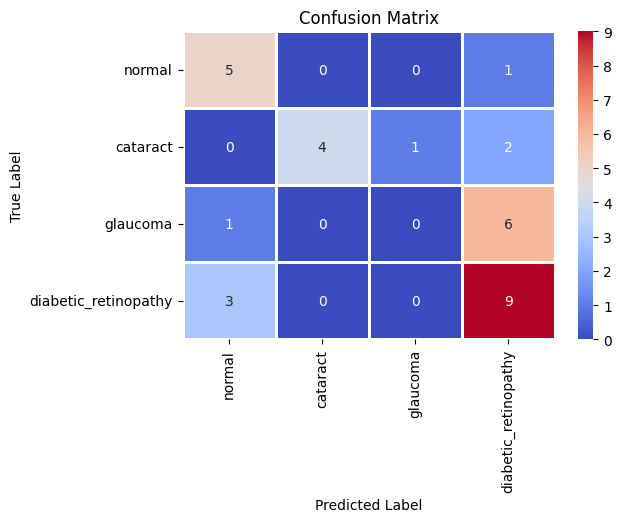

              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       1.00      0.57      0.73         7
           2       0.00      0.00      0.00         7
           3       0.50      0.75      0.60        12

    accuracy                           0.56        32
   macro avg       0.51      0.54      0.50        32
weighted avg       0.51      0.56      0.51        32



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
import seaborn as sns


def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

#y_pred_test = model.predict(X_train)
# Take the class with the highest probability from the test predictions
#max_y_pred_test = np.argmax(y_pred_test, axis=1)
#max_y_test = np.argmax(y_train_hot, axis=1)

rounded_predictions = np.argmax(testpred, axis=1)
rounded_labels=np.argmax(y_test, axis=1)


show_confusion_matrix(rounded_labels, rounded_predictions)
print(classification_report(rounded_labels, rounded_predictions))


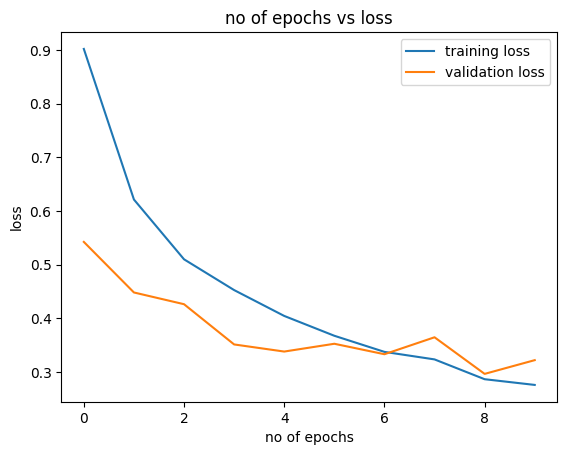

In [ ]:
acc=history1.history['loss']  ##getting  accuracy of each epochs
epochs_=range(0,EPOCHS)    
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')

acc_val=history1.history['val_loss']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation loss")
plt.title("no of epochs vs loss")
plt.legend()

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs1 = model_1.predict(test_data, batch_size=32)

[INFO] evaluating network...
27/27 [==============================] - 2s 41ms/step


In [ ]:
from sklearn.preprocessing import LabelEncoder

# assume test_labels is a 2D array of shape (num_samples, num_classes)
# convert it to a 1D array of categorical labels
le = LabelEncoder()
test_labels_cat = le.fit_transform(test_labels.argmax(axis=1))

# assume predIdxs1 is a 2D array of predicted probabilities
# compute the predicted labels as a 1D array
pred_labels = predIdxs1.argmax(axis=1)

# print the classification report
print(classification_report(test_labels_cat, pred_labels))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       209
           1       0.96      0.93      0.95       214
           2       0.88      0.72      0.79       190
           3       0.81      0.93      0.87       235

    accuracy                           0.89       848
   macro avg       0.89      0.88      0.88       848
weighted avg       0.89      0.89      0.89       848



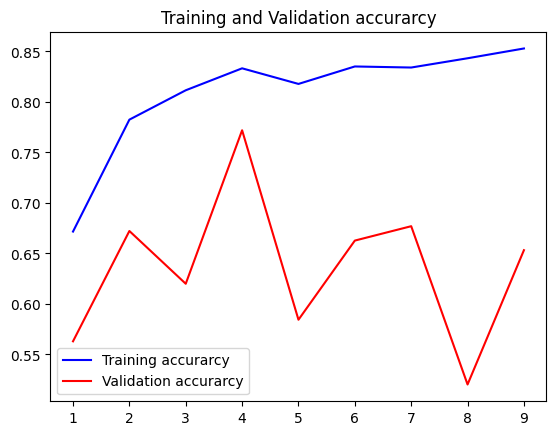

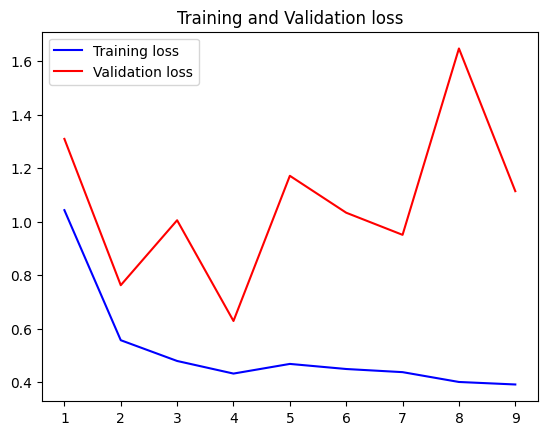

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


27/27 [==============================] - 1s 42ms/step


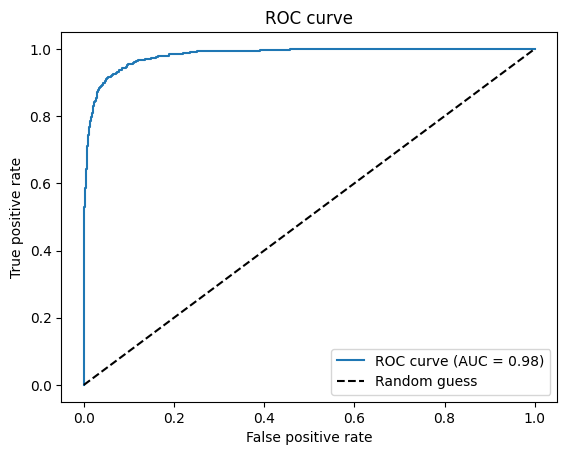

In [ ]:
# Predict probabilities for test data
y_pred_prob = model_1.predict(test_data)

# Calculate the false positive rate and the true positive rate for different threshold levels
fpr, tpr, thresholds = roc_curve(test_labels.ravel(), y_pred_prob.ravel())

# Calculate the area under the ROC curve
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')

27/27 [==============================] - 1s 41ms/step


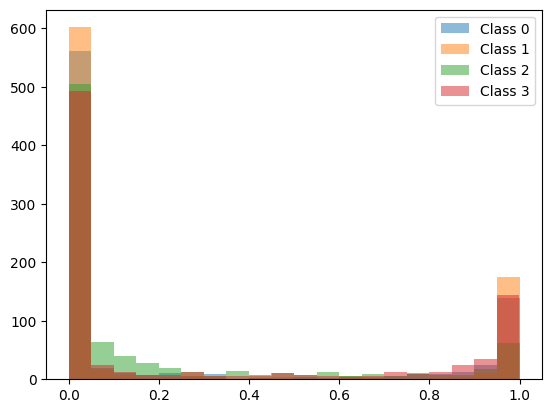

In [ ]:
y_pred = model_1.predict(test_data)
plt.hist(y_pred[:, 0], bins=20, alpha=0.5, label='Class 0')
plt.hist(y_pred[:, 1], bins=20, alpha=0.5, label='Class 1')
plt.hist(y_pred[:, 2], bins=20, alpha=0.5, label='Class 2')
plt.hist(y_pred[:, 3], bins=20, alpha=0.5, label='Class 3')
plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()



NameError: ignored

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve


target= ['normal',
           'glaucoma',
           'diabetic_retinopathy',
           'cataract']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (10, 6))

# function for scoring roc auc score for multi-class
def multiclass_precision_recall_curve(y_test, y_pred):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = precision_recall_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(tpr, fpr, label = '%s'  % (c_label))

multiclass_precision_recall_curve(y_test, y_pred)

c_ax.legend()
c_ax.set_xlabel('recall')
c_ax.set_ylabel('precision')
plt.title("precision vs. recall curve")
plt.show()

In [ ]:
WORK_DIR = '/content/drive/My Drive/Dataset_new/'

CLASSES = ['0','1','2','3','4']

IMG=224

IMAGE_SIZE = [224, 224]
DIM = (IMG,IMG )

model_acc={}
model_val_acc={}

In [ ]:
ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

Work_DIR = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

# Step 1: Prepare the new dataset
new_train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=1800, shuffle=True)

Found 1800 images belonging to 5 classes.


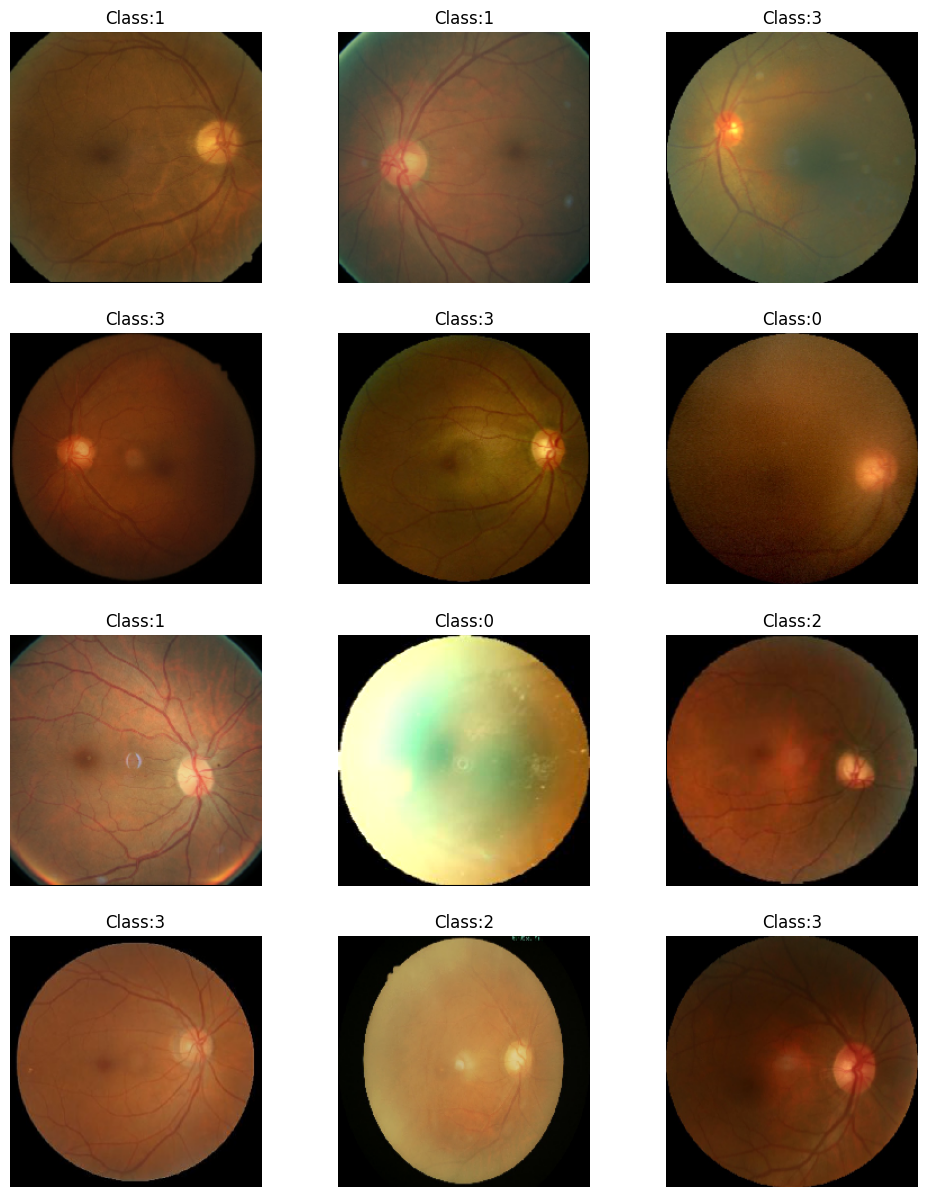

In [ ]:
# Define your classes

CLASSES = ['0','1','2','3','4'] 

# Create a dictionary mapping class indices to class names
labels = {i: CLASSES[i] for i in range(len(CLASSES))}

# Display a grid of 9 images
plt.figure(figsize=(12, 15))
for i in range(12):
  ax = plt.subplot(4, 3, i + 1)
  idx = randint(0,1800)
  plt.imshow(train_data[idx])
  plt.axis("off")
  
  # Check if the label is present in the dictionary, and add it if not
  label_idx = np.argmax(train_labels[idx])
  if label_idx not in labels:
      labels[label_idx] = f'class{label_idx+1}'
  
  plt.title("Class:{}".format(labels[label_idx]))


In [ ]:
# Step 2: Load the pre-trained model
baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

# Step 3: Modify the output layer of the model
NUM_CLASSES_NEW = 5
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(NUM_CLASSES_NEW, activation="softmax")(headModel)

# Step 4: Freeze the pre-trained layers
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
# Step 5: Train the model
val_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=32, shuffle=True)

new_model = Model(inputs=baseModel.input, outputs=headModel)
new_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
EPOCHS_NEW =10
history_new = new_model.fit(train_data_gen, epochs=EPOCHS_NEW, validation_data=val_data_gen)

Found 4237 images belonging to 4 classes.


In [ ]:
# Step 6: Fine-tune the model (optional)
for layer in baseModel.layers:
    layer.trainable = True

optimizer_fine_tune = Adam(lr=1e-5, decay=1e-5 / 20)
new_model.compile(optimizer=optimizer_fine_tune, loss=loss, metrics=metrics)
EPOCHS_FINE_TUNE = 10
history_fine_tune = new_model.fit(train_data_gen, epochs=EPOCHS_FINE_TUNE, validation_data=val_data_gen)

**XceptionV2**

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
EPOCHS = 25
INIT_LR = .001
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/drive/My Drive/Dataset/'
width=256
height=256
depth=3

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
import os

directory_root = '/content/drive/My Drive/Dataset/'

image_list, label_list = [], []

class_names = ['normal', 'glaucoma', 'diabetic_retinopathy', 'cataract']

try:
    print("[INFO] Loading images ...")
    for class_name in class_names:
        class_dir = os.path.join(directory_root, class_name)
        for image_file in os.listdir(class_dir)[:1000]:
            image_directory = os.path.join(class_dir, image_file)
            if image_directory.endswith(".jpg") or image_directory.endswith(".JPG") or image_directory.endswith(".JPEG")  or image_directory.endswith(".jpeg") or image_directory.endswith(".PNG") or image_directory.endswith(".png"):
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(class_name)
    print("[INFO] Image loading completed")

except Exception as e:
    print(f"Error: {e}")

[INFO] Loading images ...
[INFO] Image loading completed


In [ ]:
set(label_list)

{'cataract', 'diabetic_retinopathy', 'glaucoma', 'normal'}

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
print(image_labels)

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [ ]:
set(label_binarizer.classes_
    )

{'cataract', 'diabetic_retinopathy', 'glaucoma', 'normal'}

In [ ]:
print(label_binarizer.classes_)

['cataract' 'diabetic_retinopathy' 'glaucoma' 'normal']


In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [ ]:
x_train.shape

(3200, 256, 256, 3)

In [ ]:
y_train.shape

(3200, 4)

In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, \
     Add, Dense, BatchNormalization, ReLU, MaxPool2D, GlobalAvgPool2D

def conv_bn(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=strides,
               padding='same',
               use_bias=False)(x)
    x = BatchNormalization()(x)
    return x


def sep_bn(x, filters, kernel_size, strides=1):
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    return x


def entry_flow(x):
    x = conv_bn(x, filters=32, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = conv_bn(x, filters=64, kernel_size=3)
    tensor = ReLU()(x)

    x = sep_bn(tensor, filters=128, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=128, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=128, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    x = ReLU()(x)
    x = sep_bn(x, filters=256, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=256, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=256, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=728, kernel_size=1, strides=2)
    x = Add()([tensor, x])

    return x


def middle_flow(tensor):
    for _ in range(8):
        x = ReLU()(tensor)
        x = sep_bn(x, filters=728, kernel_size=3)
        x = ReLU()(x)
        x = sep_bn(x, filters=728, kernel_size=3)
        x = ReLU()(x)
        x = sep_bn(x, filters=728, kernel_size=3)

        tensor = Add()([tensor, x])

    return tensor


def exit_flow(tensor, num_classes):
    x = ReLU()(tensor)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=1024, kernel_size=3)
    x = MaxPool2D(3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=1024, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    x = sep_bn(x, filters=1536, kernel_size=3)
    x = ReLU


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.models import Model

# Define the input tensor
input_shape = (32, 32, 3)  # Assumes 32x32 RGB images
inputs = Input(shape=input_shape)

# Define the rest of the model architecture
x = Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(inputs)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = Flatten()(x)
outputs = Dense(units=10, activation='softmax')(x)

# Instantiate the model object
model = Model(inputs=inputs, outputs=outputs)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, \
     Add, Dense, BatchNormalization, ReLU, MaxPool2D, GlobalAvgPool2D

def conv_bn(x, filters, kernel_size, strides=1):
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=strides,
               padding='same',
               use_bias=False)(x)
    x = BatchNormalization()(x)
    return x


def sep_bn(x, filters, kernel_size, strides=1):
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    return x


def entry_flow(x):
    x = conv_bn(x, filters=32, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = conv_bn(x, filters=64, kernel_size=3)
    tensor = ReLU()(x)

    x = sep_bn(tensor, filters=128, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=128, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=128, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    x = ReLU()(x)
    x = sep_bn(x, filters=256, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=256, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=256, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=728, kernel_size=1, strides=2)
    x = Add()([tensor, x])

    return x


def middle_flow(tensor):
    for _ in range(8):
        x = ReLU()(tensor)
        x = sep_bn(x, filters=728, kernel_size=3)
        x = ReLU()(x)
        x = sep_bn(x, filters=728, kernel_size=3)
        x = ReLU()(x)
        x = sep_bn(x, filters=728, kernel_size=3)

        tensor = Add()([tensor, x])

    return tensor


def exit_flow(tensor, num_classes):
    x = ReLU()(tensor)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=1024, kernel_size=3)
    x = MaxPool2D(3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=1024, kernel_size=1, strides=2)

    x = Add()([tensor, x])
    x = sep_bn(x, filters=1536, kernel_size=3)
    x = ReLU

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                327690    
                                                                 
Total params: 332,778
Trainable params: 332,778
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import tensorflow as tf  
#stop training is model accuracy reached 99% 
class myCallback(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}): 
    if(logs.get('val_acc')>0.99): 
      self.model.stop_training = True

In [ ]:
import tensorflow as tf

# Stop training if model accuracy reached 99%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.99):
      self.model.stop_training = True

# Define dataset path and number of classes
dataset_path = '/content/drive/My Drive/Dataset/'
num_classes = 4

# Data preprocessing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Train the model
callbacks = myCallback()
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size,
    epochs=50,
    callbacks=[callbacks]
)


Found 3392 images belonging to 4 classes.
Found 845 images belonging to 4 classes.
Epoch 1/50
106/106 [==============================] - 109s 895ms/step - loss: 1.2117 - acc: 0.4543 - val_loss: 1.2049 - val_acc: 0.4363
Epoch 2/50
106/106 [==============================] - 94s 885ms/step - loss: 0.9597 - acc: 0.5943 - val_loss: 1.1141 - val_acc: 0.4832
Epoch 3/50
106/106 [==============================] - 83s 790ms/step - loss: 0.7064 - acc: 0.7255 - val_loss: 1.3041 - val_acc: 0.4339
Epoch 4/50
106/106 [==============================] - 89s 845ms/step - loss: 0.6080 - acc: 0.7748 - val_loss: 1.1326 - val_acc: 0.5072
Epoch 5/50
106/106 [==============================] - 84s 789ms/step - loss: 0.5520 - acc: 0.7892 - val_loss: 1.1259 - val_acc: 0.5228
Epoch 6/50
106/106 [==============================] - 90s 847ms/step - loss: 0.4825 - acc: 0.8258 - val_loss: 1.0695 - val_acc: 0.5120
Epoch 7/50
106/106 [==============================] - 90s 850ms/step - loss: 0.4509 - acc: 0.8308 - val_lo

**Xception** **Etao Add korte hbe**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from PIL import Image
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, roc_curve, auc, recall_score, precision_score

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
WORK_DIR = '/content/drive/My Drive/Dataset/'

CLASSES = ['normal',
           'glaucoma',
           'diabetic_retinopathy',
           'cataract'
          ]

IMG = 224

IMAGE_SIZE = [224, 224]
DIM = (IMG, IMG)

model_acc = {}
model_val_acc = {}


ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale=1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=4237, shuffle=True)

Found 4237 images belonging to 4 classes.


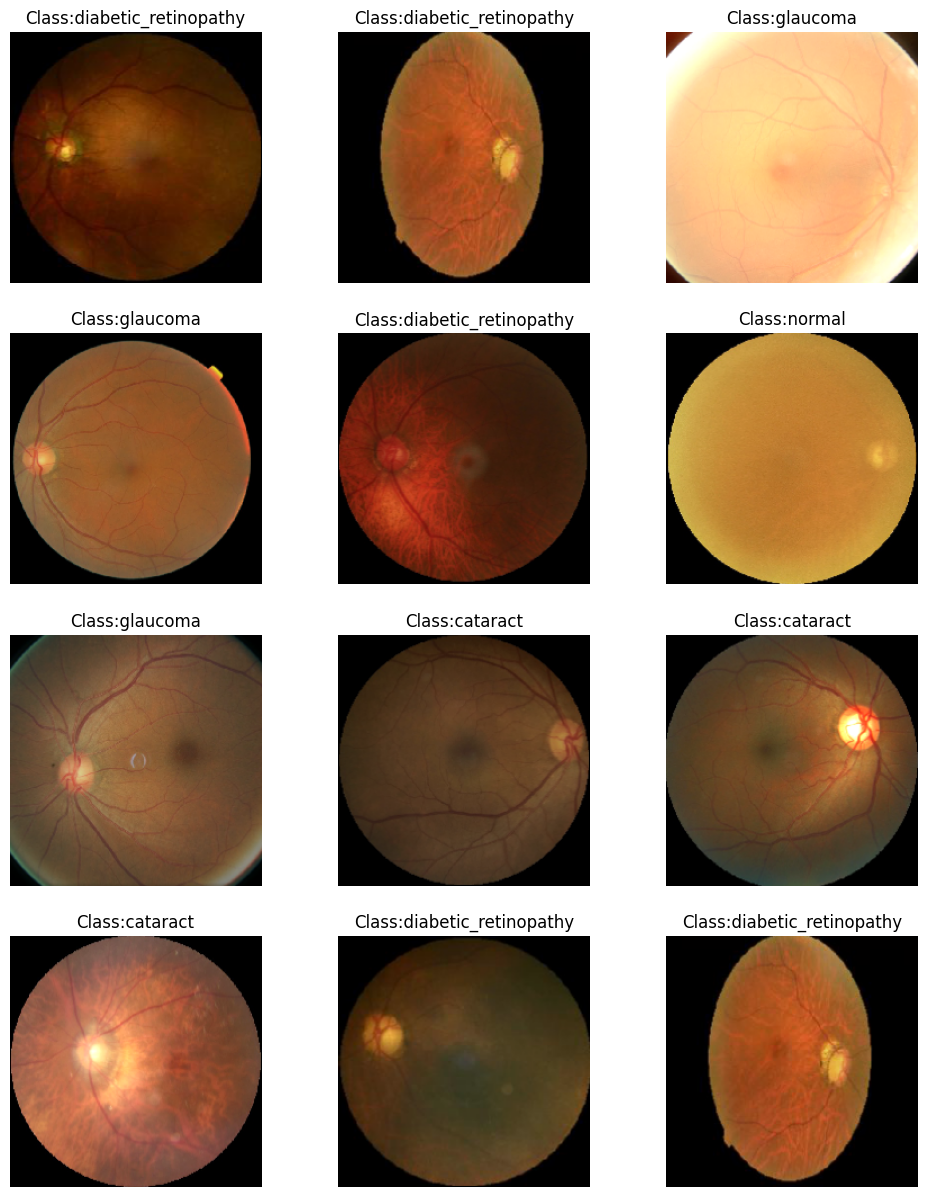

In [ ]:
from random import randint
   
# get image lables
labels =dict(zip([0,1,2,3], CLASSES))
# get a batch of images
train_data, train_labels = train_data_gen.next()
    
# display a grid of 9 images
plt.figure(figsize=(12, 15))
for i in range(12):
  ax = plt.subplot(4, 3, i + 1)
  idx = randint(0,4237)
  plt.imshow(train_data[idx])
  plt.axis("off")
  plt.title("Class:{}".format(labels[np.argmax(train_labels[idx])]))


In [ ]:
#Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#Build Xception model
base_model = Xception(include_top=False, input_shape=IMAGE_SIZE + [3])

#Freeze the layers in the base model to prevent them from being trained
for layer in base_model.layers:
 layer.trainable = False

#Create the final layers of the model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(CLASSES), activation='softmax')(x)

#Combine the base model and final layers
model = Model(inputs=base_model.input, outputs=output)

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))



Epoch 1/30
85/85 [==============================] - 31s 205ms/step - loss: 2.9872 - accuracy: 0.5186 - val_loss: 0.7764 - val_accuracy: 0.7052
Epoch 2/30
85/85 [==============================] - 15s 183ms/step - loss: 0.8729 - accuracy: 0.5917 - val_loss: 0.6738 - val_accuracy: 0.7300
Epoch 3/30
85/85 [==============================] - 16s 183ms/step - loss: 0.7820 - accuracy: 0.6341 - val_loss: 0.5819 - val_accuracy: 0.7795
Epoch 4/30
85/85 [==============================] - 14s 163ms/step - loss: 0.7499 - accuracy: 0.6595 - val_loss: 0.5494 - val_accuracy: 0.7983
Epoch 5/30
85/85 [==============================] - 16s 187ms/step - loss: 0.6904 - accuracy: 0.6920 - val_loss: 0.6120 - val_accuracy: 0.7583
Epoch 6/30
85/85 [==============================] - 14s 168ms/step - loss: 0.6659 - accuracy: 0.7056 - val_loss: 0.5388 - val_accuracy: 0.7889
Epoch 7/30
85/85 [==============================] - 16s 190ms/step - loss: 0.6207 - accuracy: 0.7056 - val_loss: 0.4620 - val_accuracy: 0.8349

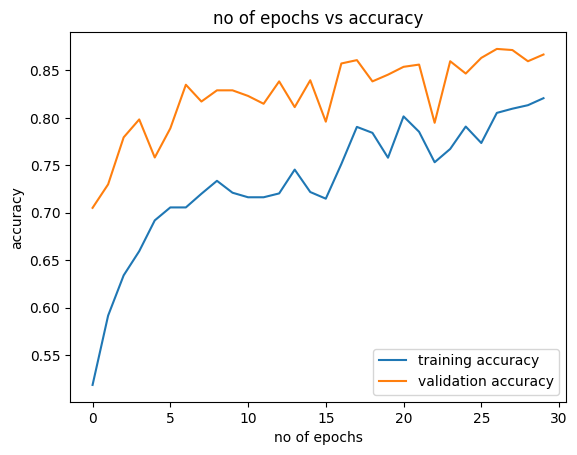

In [ ]:
epochs = 30
acc = history.history['accuracy']  ##getting  accuracy of each epochs
epochs_ = range(epochs)    
plt.plot(epochs_, acc, label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val = history.history['val_accuracy']  ##getting validation accuracy of each epochs
plt.plot(epochs_, acc_val, label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

In [ ]:
Train_acc1=history.history['accuracy'][-1]
Val_acc1=history.history['val_accuracy'][-1]

model_acc["MobileNet"]=Train_acc1
model_val_acc["MobileNet"]=Val_acc1
print("Train accuracy",Train_acc1)
print("Validation accuracy",Val_acc1)

Train accuracy 0.8207303285598755
Validation accuracy 0.8667452931404114


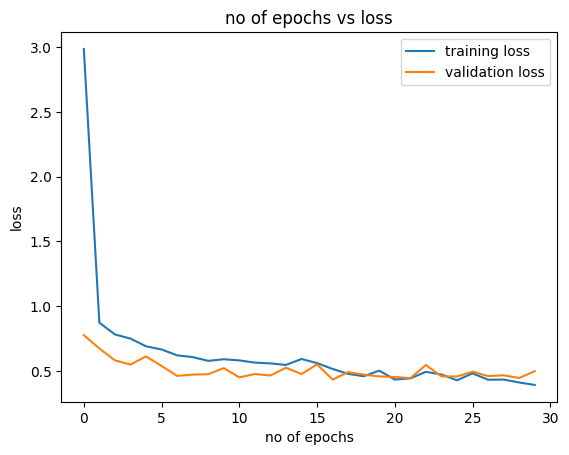

In [ ]:
acc=history.history['loss']  ##getting  accuracy of each epochs
epochs_ = range(epochs)    
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')

acc_val=history.history['val_loss']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation loss")
plt.title("no of epochs vs loss")
plt.legend()

Text(0, 0.5, 'loss')

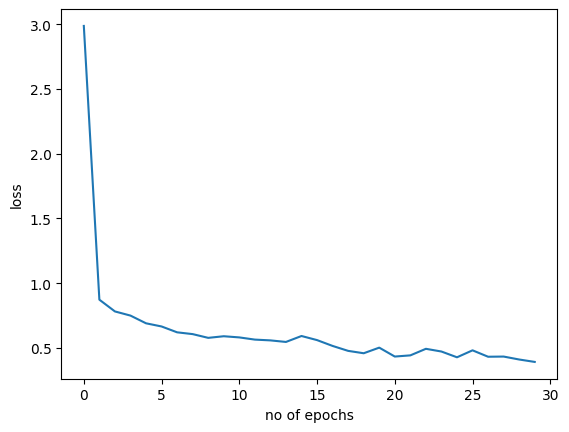

In [ ]:
acc=history.history['loss']  ##getting  accuracy of each epochs
epochs_=range(0,epochs)    
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
test_dir = '/content/drive/My Drive/Dataset/'
# define the data generator for testing set
test_datagen = ImageDataGenerator(rescale=1./255)

# create the testing set generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')


Found 4237 images belonging to 4 classes.


In [ ]:
# define the testing set directory
test_dir ='/content/drive/My Drive/Dataset/'

# create a data generator for the testing set
test_datagen = ImageDataGenerator(rescale=1./255)

# create the testing set generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

# get the ground truth labels for the testing set
test_labels = test_generator.classes

Found 4237 images belonging to 4 classes.


In [ ]:
from sklearn.preprocessing import LabelEncoder
predIdxs1 = model.predict(test_generator, steps=len(test_generator), verbose=1)


# assume test_labels is a 2D array of shape (num_samples, num_classes)
# convert it to a 1D array of categorical labels
le = LabelEncoder()
import numpy as np

test_labels = np.reshape(test_labels, (-1, 1))
test_labels_cat = le.fit_transform(test_labels.argmax(axis=1))

# assume predIdxs1 is a 2D array of predicted probabilities
# compute the predicted labels as a 1D array
pred_labels = predIdxs1.argmax(axis=1)

# print the classification report
print(classification_report(test_labels_cat, pred_labels))


133/133 [==============================] - 49s 365ms/step
              precision    recall  f1-score   support

           0       1.00      0.26      0.42      4237
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.26      4237
   macro avg       0.25      0.07      0.10      4237
weighted avg       1.00      0.26      0.42      4237



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
import seaborn as sns
from skimage.transform import resize

# Resize all test images to (224, 224, 3)
X_test_resized = np.array([resize(image, (224, 224, 3)) for image in X_test])

# Make predictions on the resized test data
testpred = model.predict(X_test_resized)

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

#y_pred_test = model.predict(X_train)
# Take the class with the highest probability from the test predictions
#max_y_pred_test = np.argmax(y_pred_test, axis=1)
#max_y_test = np.argmax(y_train_hot, axis=1)
from keras.utils import to_categorical

y_test_one_hot = to_categorical(y_test)
rounded_predictions = np.argmax(testpred, axis=1)
rounded_labels = np.argmax(y_test, axis=None)


show_confusion_matrix(rounded_labels, rounded_predictions)
print(classification_report(rounded_labels, rounded_predictions))


1/1 [==============================] - 0s 35ms/step


TypeError: ignored

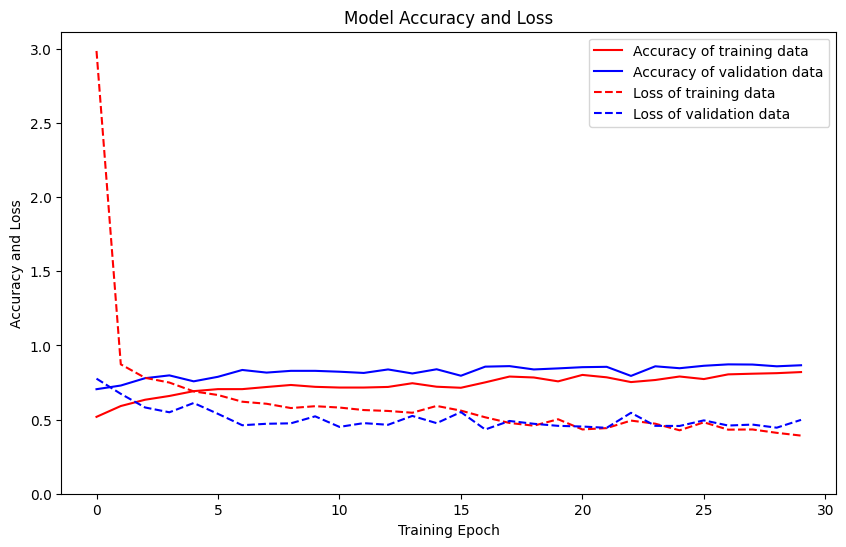

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()



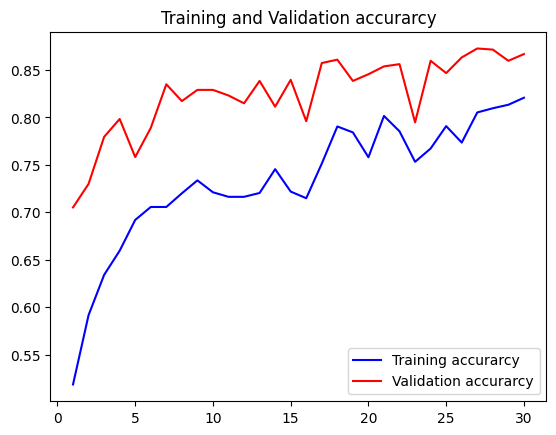

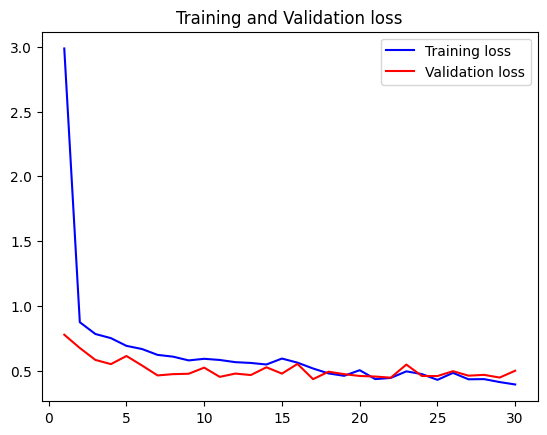

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

#Train and validation accuracy
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


133/133 [==============================] - 45s 340ms/step


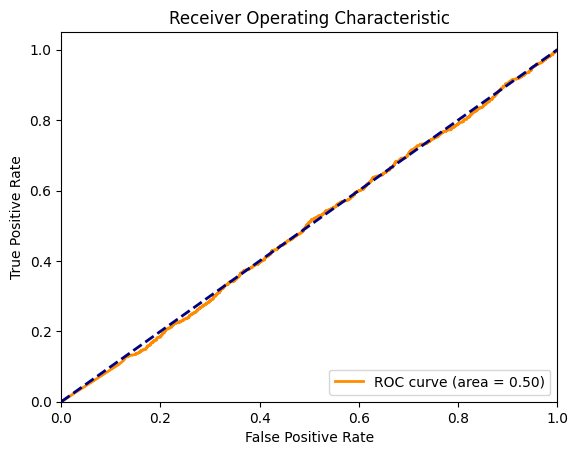

In [ ]:
#Roc
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
pred_probs = model.predict(test_generator)

# Get the true class labels
true_labels = test_generator.classes

# Get the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, pred_probs[:,1], pos_label=1)

# Compute the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Predict the classes for the test set images
preds = model.predict(test_generator)

# Get the predicted class labels
predicted_labels = np.argmax(preds, axis=1)

# Get the true class labels
true_labels = test_generator.classes

# Get the class names
class_names = list(test_generator.class_indices.keys())

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion matrix:")
print(cm)


133/133 [==============================] - 44s 326ms/step
Confusion matrix:
[[259 260 215 304]
 [290 296 209 303]
 [285 247 203 272]
 [281 302 222 289]]


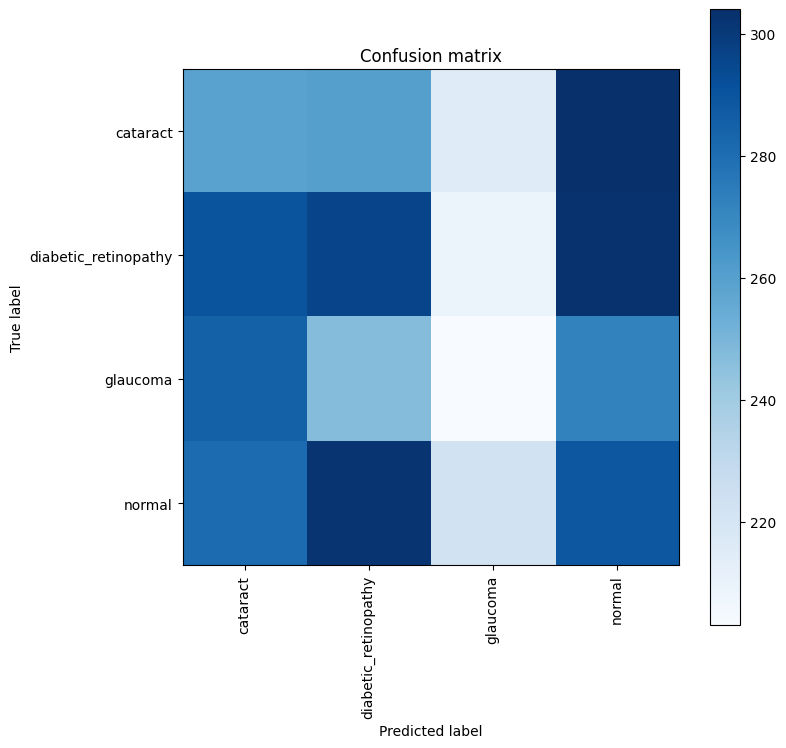

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
import seaborn as snsc
sns.heatmap(cf1, annot=True,fmt="1.0f")

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
import seaborn as sns
# Define x_test and y_test
x_test, y_test = validation_generator.next()

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
testpred = model.predict(x_test)
LABELS = ['ClientRaw','ImposterRaw']

def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

#y_pred_test = model.predict(X_train)
# Take the class with the highest probability from the test predictions
#max_y_pred_test = np.argmax(y_pred_test, axis=1)
#max_y_test = np.argmax(y_train_hot, axis=1)

rounded_predictions = np.argmax(testpred, axis=1)
rounded_labels=np.argmax(y_test, axis=1)


show_confusion_matrix(rounded_labels, rounded_predictions)
print(classification_report(rounded_labels, rounded_predictions))


InvalidArgumentError: ignored

In [ ]:
#Split the dataset into training, validation, and testing sets


predictions = model.evaluate(X_test, Y_test)
print("Loss = " + str(predictions[0]))
print("Test Accuracy = " + str(predictions[1]))

NameError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder

# assume test_labels is a 2D array of shape (num_samples, num_classes)
# convert it to a 1D array of categorical labels
le = LabelEncoder()
test_labels_cat = le.fit_transform(test_labels.argmax(axis=1))

# assume predIdxs1 is a 2D array of predicted probabilities
# compute the predicted labels as a 1D array
pred_labels = predIdxs1.argmax(axis=1)

# print the classification report
print(classification_report(test_labels_cat, pred_labels))

NameError: ignored

In [ ]:
cf1=confusion_matrix(test_labels.argmax(axis=1), predIdxs1)
cf1

array([[239,   1],
       [  0, 624]])

In [ ]:
import seaborn as snsc
sns.heatmap(cf1, annot=True,fmt="1.0f")

In [ ]:
#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_val, y_val)

model_acc['Xception'] = test_accuracy
model_val_acc['Xception'] = history.history['val_accuracy'][-1]

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

NameError: ignored

In [ ]:

Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Make predictions on the validation set
y_pred = model.predict(X_val)

Get the index of the class with the highest probability score
y_pred = np.argmax(y_pred, axis=1)

Get the true class labels
y_true = np.argmax(y_val, axis=1)

Generate the classification report and confusion matrix
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=CLASSES))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Generate the ROC curve and calculate the AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

SyntaxError: ignored

basic-L(Lion, fine-tuned) **model**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from PIL import Image
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,precision_score,roc_curve,auc,recall_score,precision_score

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

In [ ]:
WORK_DIR = '/content/drive/My Drive/Dataset/'
CLASSES = ['normal', 'glaucoma', 'diabetic_retinopathy', 'cataract']
IMG_SIZE = 224

# Data augmentation
datagen = IDG(rescale = 1./255, 
              shear_range = 0.2, 
              zoom_range = 0.2,
              horizontal_flip = True,
              validation_split=0.2)

train_datagen = datagen.flow_from_directory(directory=WORK_DIR, 
                                            target_size=(IMG_SIZE, IMG_SIZE),
                                            batch_size=32, 
                                            shuffle=True, 
                                            class_mode='categorical', 
                                            subset='training')

val_datagen = datagen.flow_from_directory(directory=WORK_DIR, 
                                          target_size=(IMG_SIZE, IMG_SIZE), 
                                          batch_size=32, 
                                          shuffle=True, 
                                          class_mode='categorical',
                                          subset='validation')

Found 3392 images belonging to 4 classes.
Found 845 images belonging to 4 classes.


In [ ]:
# Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(CLASSES), activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# Train the model
EPOCHS = 50
history = model.fit(train_datagen,
                    steps_per_epoch=train_datagen.n // train_datagen.batch_size,
                    validation_data=val_datagen,
                    validation_steps=val_datagen.n // val_datagen.batch_size,
                    epochs=EPOCHS)

Epoch 1/50
106/106 [==============================] - 2187s 20s/step - loss: 1.3323 - accuracy: 0.3284 - val_loss: 1.3278 - val_accuracy: 0.3450
Epoch 2/50
106/106 [==============================] - 87s 827ms/step - loss: 1.2072 - accuracy: 0.4428 - val_loss: 1.2793 - val_accuracy: 0.4087
Epoch 3/50
106/106 [==============================] - 93s 880ms/step - loss: 1.0719 - accuracy: 0.5189 - val_loss: 1.4993 - val_accuracy: 0.3678
Epoch 4/50
106/106 [==============================] - 92s 866ms/step - loss: 0.9649 - accuracy: 0.5696 - val_loss: 1.4882 - val_accuracy: 0.3978
Epoch 5/50
106/106 [==============================] - 86s 813ms/step - loss: 0.8981 - accuracy: 0.5908 - val_loss: 1.4557 - val_accuracy: 0.4075
Epoch 6/50
106/106 [==============================] - 84s 797ms/step - loss: 0.8440 - accuracy: 0.6073 - val_loss: 1.5359 - val_accuracy: 0.4195
Epoch 7/50
106/106 [==============================] - 84s 797ms/step - loss: 0.8366 - accuracy: 0.6324 - val_loss: 1.5933 - val_ac

**MobileNetV2** **bnfdf**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from PIL import Image
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc

from tensorflow.keras.layers import (
    AveragePooling2D, BatchNormalization, Conv2D, Dense, Dropout, Flatten, GlobalAveragePooling2D, Input, MaxPooling2D,
    SeparableConv2D,
)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.models import Model

In [ ]:
WORK_DIR = '/content/drive/My Drive/Dataset/'

CLASSES = [
    'normal',
    'glaucoma',
    'diabetic_retinopathy',
    'cataract',
]

IMG_SIZE = 224

IMAGE_SIZE = [IMG_SIZE, IMG_SIZE]
DIM = (IMG_SIZE, IMG_SIZE)

model_acc = {}
model_val_acc = {}

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(
    rescale=1. / 255,
    brightness_range=BRIGHT_RANGE,
    zoom_range=ZOOM,
    data_format=DATA_FORMAT,
    fill_mode=FILL_MODE,
    horizontal_flip=HORZ_FLIP,
)

train_data_gen = work_dr.flow_from_directory(
    directory=WORK_DIR,
    target_size=DIM,
    batch_size=4237,
    shuffle=True,
)

Found 4237 images belonging to 4 classes.


In [ ]:
def display_samples(images, labels):
    # get image labels
    labels_map = dict(zip([0, 1, 2, 3], CLASSES))

    # display a grid of 12 images
    plt.figure(figsize=(12, 15))
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        idx = randint(0, images.shape[0] - 1)
        plt.imshow(images[idx])
        plt.axis("off")
        plt.title(f"Class: {labels_map[np.argmax(labels[idx])]}")

    plt.show()


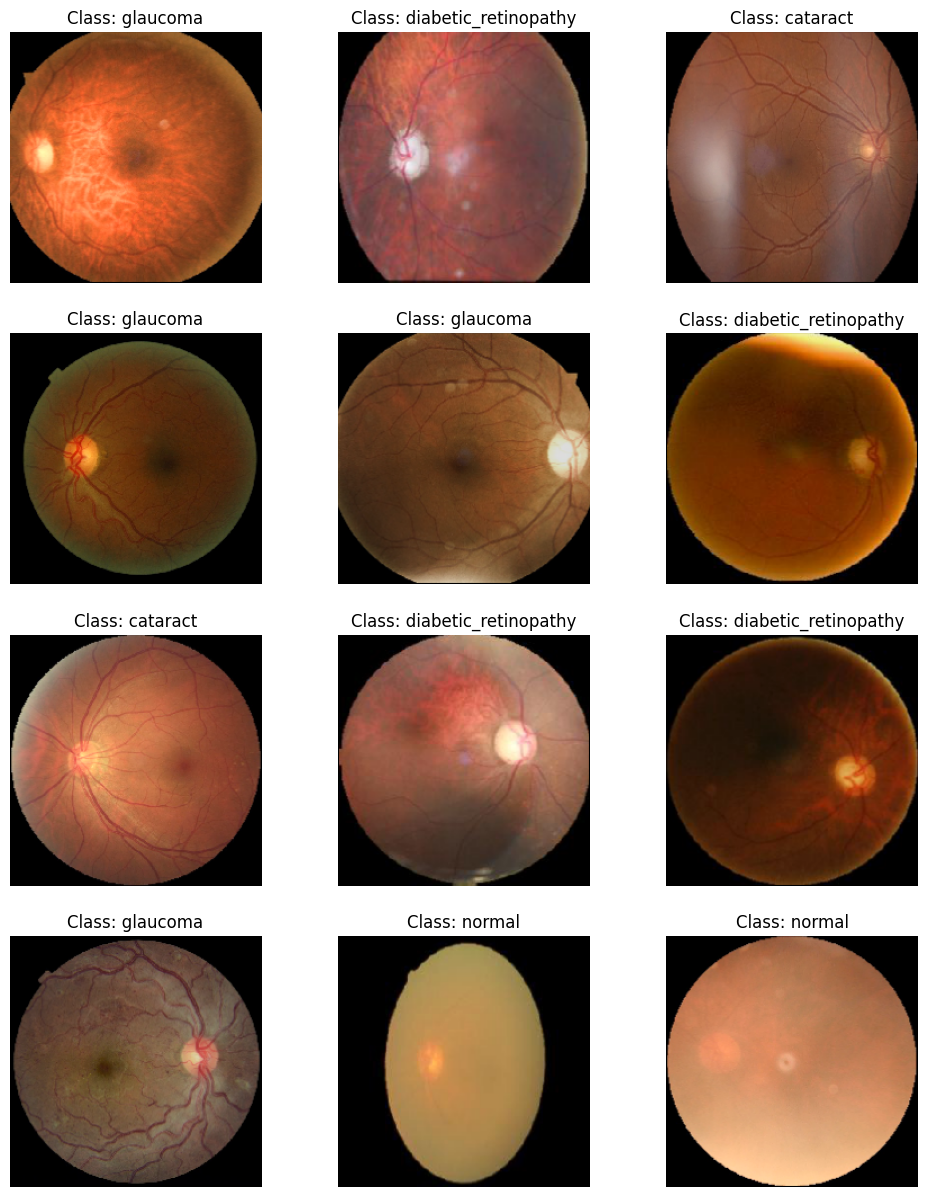

(4237, 224, 224, 3) (4237, 4)


9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
train_data, train_labels = train_data_gen.next()
display_samples(train_data, train_labels)
print(train_data.shape, train_labels.shape)

train_data, test_data, train_labels, test_labels = train_test_split(
    train_data,
    train_labels,
    test_size=0.2,
    random_state=42,
)

base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_tensor=Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
)
base_model.summary()

In [ ]:
# Define the number of classes
NUM_CLASSES = 4

# construct the head of the model that will be placed on top of the
# the base model
head_model = base_model.output
head_model = AveragePooling2D(pool_size=(7, 7))(head_model)
head_model = Flatten(name="flatten")(head_model)
head_model = Dense(128, activation="relu")(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(64, activation="relu")(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(32, activation="relu")(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(NUM_CLASSES,activation="softmax")(head_model)

In [ ]:
model = Model(inputs=base_model.input, outputs=head_model)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(
loss="categorical_crossentropy",
optimizer="adam",
metrics=["accuracy"]
)

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
EPOCHS = 10
history1 = model.fit(train_data, train_labels, validation_data=(test_data, test_labels),batch_size=32, epochs=EPOCHS)

Epoch 1/10
106/106 [==============================] - 24s 94ms/step - loss: 0.8557 - accuracy: 0.6315 - val_loss: 0.5507 - val_accuracy: 0.7889
Epoch 2/10
106/106 [==============================] - 6s 56ms/step - loss: 0.6108 - accuracy: 0.7616 - val_loss: 0.4546 - val_accuracy: 0.8267
Epoch 3/10
106/106 [==============================] - 6s 59ms/step - loss: 0.5155 - accuracy: 0.8050 - val_loss: 0.4455 - val_accuracy: 0.8302
Epoch 4/10
106/106 [==============================] - 6s 54ms/step - loss: 0.4524 - accuracy: 0.8374 - val_loss: 0.4142 - val_accuracy: 0.8479
Epoch 5/10
106/106 [==============================] - 6s 60ms/step - loss: 0.3973 - accuracy: 0.8616 - val_loss: 0.3649 - val_accuracy: 0.8644
Epoch 6/10
106/106 [==============================] - 6s 59ms/step - loss: 0.3571 - accuracy: 0.8734 - val_loss: 0.3727 - val_accuracy: 0.8644
Epoch 7/10
106/106 [==============================] - 6s 60ms/step - loss: 0.3364 - accuracy: 0.8728 - val_loss: 0.4152 - val_accuracy: 0.838

Epoch 1/10
106/106 [==============================] - 10s 90ms/step - loss: 0.2619 - accuracy: 0.9079 - val_loss: 0.4013 - val_accuracy: 0.8644
Epoch 2/10
106/106 [==============================] - 6s 54ms/step - loss: 0.2382 - accuracy: 0.9141 - val_loss: 0.3669 - val_accuracy: 0.8785
Epoch 3/10
106/106 [==============================] - 6s 55ms/step - loss: 0.2280 - accuracy: 0.9141 - val_loss: 0.3515 - val_accuracy: 0.8774
Epoch 4/10
106/106 [==============================] - 6s 55ms/step - loss: 0.2339 - accuracy: 0.9138 - val_loss: 0.3886 - val_accuracy: 0.8868
Epoch 5/10
106/106 [==============================] - 6s 56ms/step - loss: 0.2269 - accuracy: 0.9106 - val_loss: 0.3484 - val_accuracy: 0.8892
Epoch 6/10
106/106 [==============================] - 6s 55ms/step - loss: 0.1896 - accuracy: 0.9301 - val_loss: 0.3715 - val_accuracy: 0.8880
Epoch 7/10
106/106 [==============================] - 6s 56ms/step - loss: 0.1917 - accuracy: 0.9321 - val_loss: 0.4441 - val_accuracy: 0.880

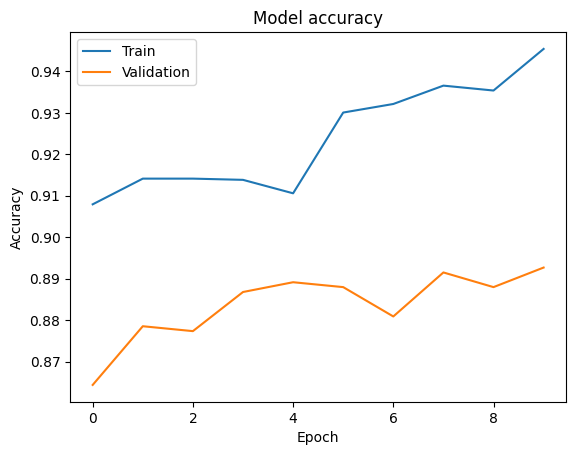

In [ ]:
history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=10)

# Plot the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

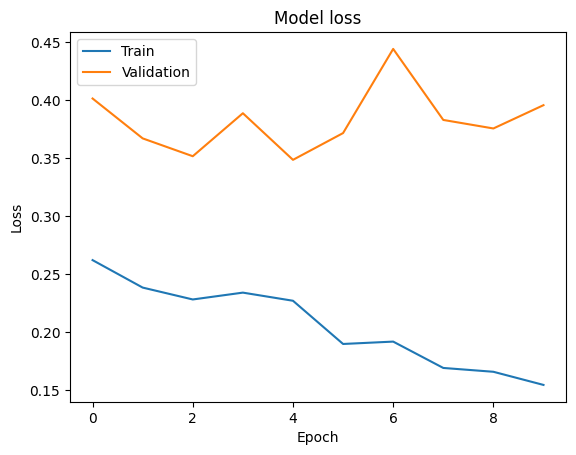

In [ ]:
# Plot the training and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Compile the model with 'precision' metric
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy", tf.keras.metrics.Precision()]
)

# Train the model
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels),
    epochs=EPOCHS,
    batch_size=32,
)

# Plot the training and validation precision over the epochs
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot the training and validation recall over the epochs
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**Resnet50**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from PIL import Image
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, roc_curve, auc, recall_score, precision_score

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model

Found 4237 images belonging to 4 classes.
(4237, 224, 224, 3) (4237, 4)


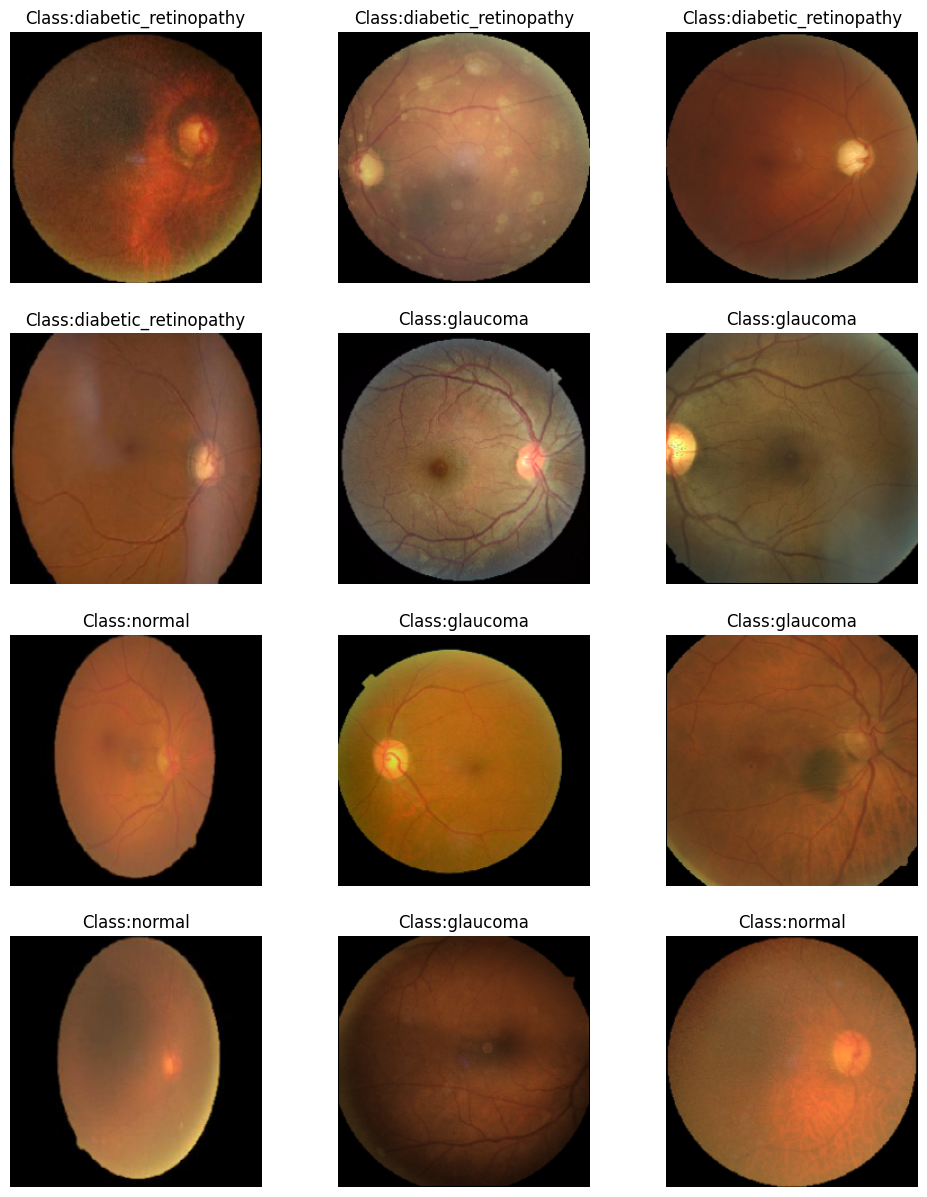

In [ ]:
WORK_DIR = '/content/drive/My Drive/Dataset/'

CLASSES = ['normal', 'glaucoma', 'diabetic_retinopathy', 'cataract']

IMG = 224

IMAGE_SIZE = [224, 224]
DIM = (IMG, IMG)

model_acc = {}
model_val_acc = {}

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale=1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=4237, shuffle=True)


from random import randint
   
# get image labels
labels = dict(zip([0, 1, 2, 3], CLASSES))
# get a batch of images
train_data, train_labels = train_data_gen.next()
    
# display a grid of 9 images
plt.figure(figsize=(12, 15))
for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    idx = randint(0, 4237)
    plt.imshow(train_data[idx])
    plt.axis("off")
    plt.title("Class:{}".format(labels[np.argmax(train_labels[idx])]))


print(train_data.shape, train_labels.shape)


train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
baseModel.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:

from keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Define the number of classes
NUM_CLASSES = 4
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(NUM_CLASSES, activation="softmax")(headModel)

In [ ]:
model_1 = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
for layer in baseModel.layers:
    layer.trainable = False


In [ ]:
optimizer = Adam(lr=1e-4, decay=1e-4 / 20)
loss = CategoricalCrossentropy()
metrics = ["acc"]

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model_1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
EPOCHS = 50
history1 = model_1.fit(train_data, train_labels, validation_data=(test_data, test_labels),batch_size=32, epochs=EPOCHS)

Epoch 1/50
106/106 [==============================] - 31s 173ms/step - loss: 1.4262 - acc: 0.2549 - val_loss: 1.3824 - val_acc: 0.2807
Epoch 2/50
106/106 [==============================] - 13s 119ms/step - loss: 1.3938 - acc: 0.2473 - val_loss: 1.3795 - val_acc: 0.2866
Epoch 3/50
106/106 [==============================] - 13s 120ms/step - loss: 1.3897 - acc: 0.2417 - val_loss: 1.3777 - val_acc: 0.3361
Epoch 4/50
106/106 [==============================] - 13s 121ms/step - loss: 1.3828 - acc: 0.2806 - val_loss: 1.3751 - val_acc: 0.2925
Epoch 5/50
106/106 [==============================] - 13s 123ms/step - loss: 1.3854 - acc: 0.2629 - val_loss: 1.3764 - val_acc: 0.2476
Epoch 6/50
106/106 [==============================] - 13s 124ms/step - loss: 1.3816 - acc: 0.2780 - val_loss: 1.3700 - val_acc: 0.3420
Epoch 7/50
106/106 [==============================] - 13s 125ms/step - loss: 1.3763 - acc: 0.2865 - val_loss: 1.3625 - val_acc: 0.3774
Epoch 8/50
106/106 [==============================] - 1

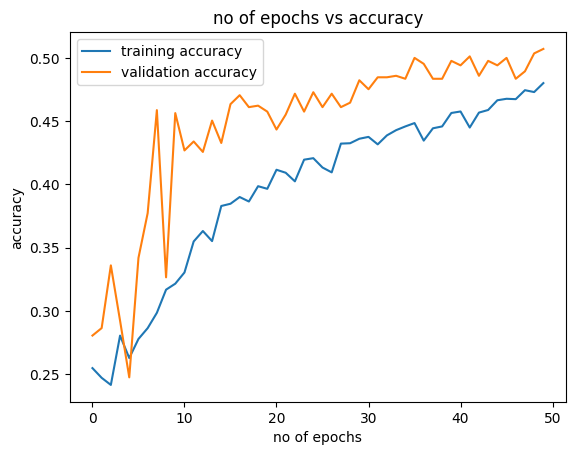

In [ ]:
acc=history1.history['acc'] ##getting accuracy of each epochs
epochs_=range(0,EPOCHS)
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history1.history['val_acc'] ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

Train accuracy 0.480082631111145
Validation accuracy 0.5070754885673523


Text(0, 0.5, 'loss')

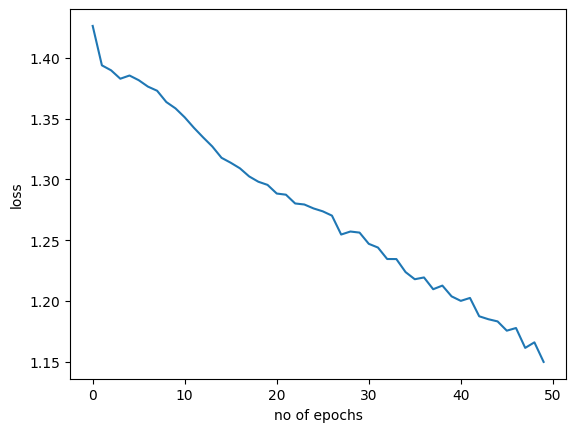

In [ ]:
Train_acc1=history1.history['acc'][-1]
Val_acc1=history1.history['val_acc'][-1]

model_acc["ResNet50"]=Train_acc1
model_val_acc["ResNet50"]=Val_acc1
print("Train accuracy",Train_acc1)
print("Validation accuracy",Val_acc1)

acc=history1.history['loss'] ##getting accuracy of each epochs
epochs_=range(0,EPOCHS)
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')

Inception **V3**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from PIL import Image
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, roc_curve, auc, recall_score, precision_score

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
WORK_DIR = '/content/drive/My Drive/Dataset/'

CLASSES = ['normal',
           'glaucoma',
           'diabetic_retinopathy',
           'cataract'
          ]

IMG=224

IMAGE_SIZE = [224, 224]
DIM = (IMG, IMG)

model_acc={}
model_val_acc={}



ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale=1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=4237, shuffle=True)


Found 4237 images belonging to 4 classes.


IndexError: ignored

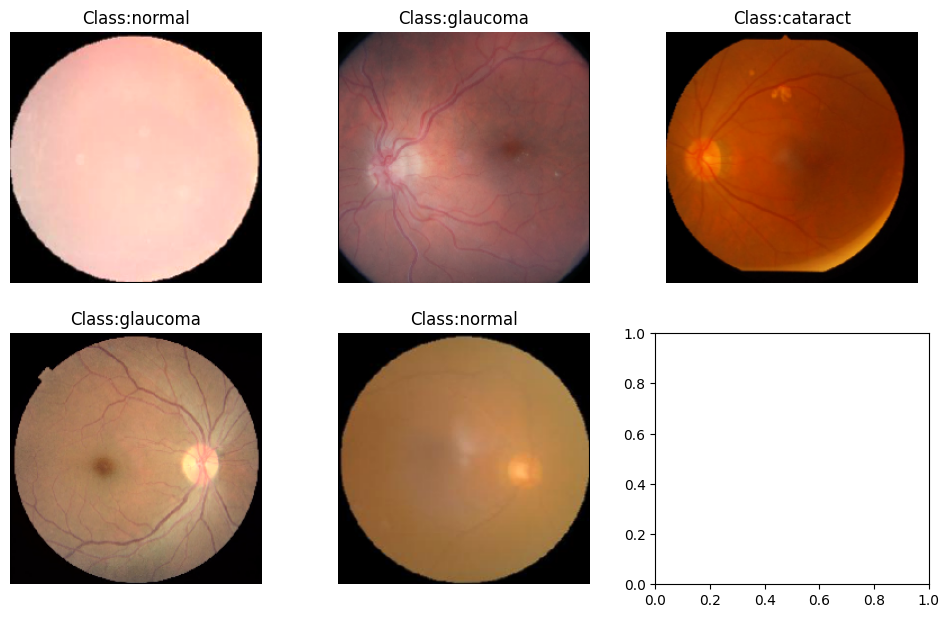

In [ ]:
from random import randint
   
# get image lables
labels =dict(zip([0, 1, 2, 3], CLASSES))
# get a batch of images
train_data, train_labels = train_data_gen.next()
    
# display a grid of 9 images
plt.figure(figsize=(12, 15))
for i in range(12):
  ax = plt.subplot(4, 3, i + 1)
  idx = randint(0, 4237)
  plt.imshow(train_data[idx])
  plt.axis("off")
  plt.title("Class:{}".format(labels[np.argmax(train_labels[idx])]))


print(train_data.shape, train_labels.shape)


train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


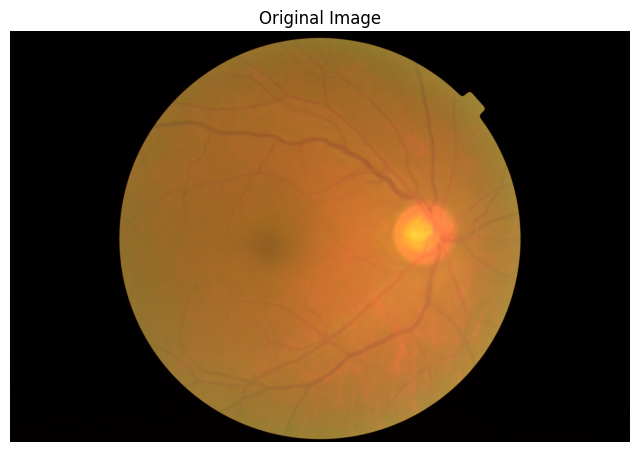

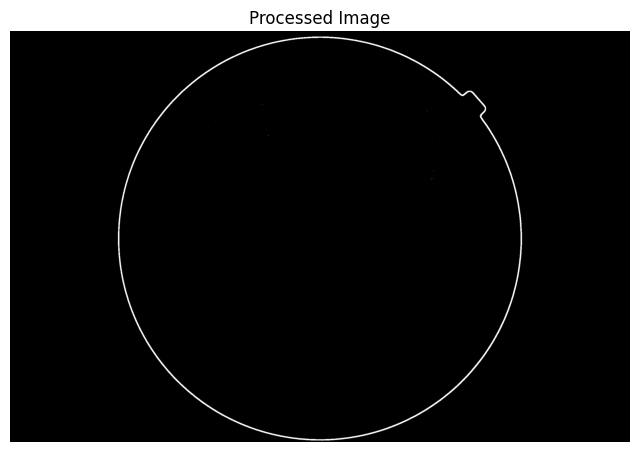

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load the image
img = cv2.imread('/content/drive/My Drive/Dataset/glaucoma/Glaucoma_101.png')

# display the original image
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# apply adaptive thresholding to obtain a binary image
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 4)

# display the processed image
plt.figure(figsize=(8,8))
plt.imshow(thresh, cmap='gray')
plt.title('Processed Image')
plt.axis('off')
plt.show()


In [ ]:

baseModel = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
baseModel.summary()


from keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Define the number of classes
NUM_CLASSES = 4

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(8, 8))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(NUM_CLASSES, activation="softmax")(headModel)

NameError: ignored

In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
for layer in baseModel.layers:
layer.trainable = False

In [ ]:
optimizer = Adam(lr=1e-4, decay=1e-4 / 20)
loss = CategoricalCrossentropy()

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.summary()

In [ ]:
EPOCHS = 20
BATCH_SIZE = 32

history = model.fit(
train_data,
train_labels,
batch_size=BATCH_SIZE,
epochs=EPOCHS,
validation_data=(test_data, test_labels)
)

In [ ]:
model.save('/content/drive/My Drive/Dataset/eye_disease_classification.h5')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Resnet50**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from PIL import Image
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, roc_curve, auc, recall_score, precision_score

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 4237 images belonging to 4 classes.
(4237, 224, 224, 3) (4237, 4)


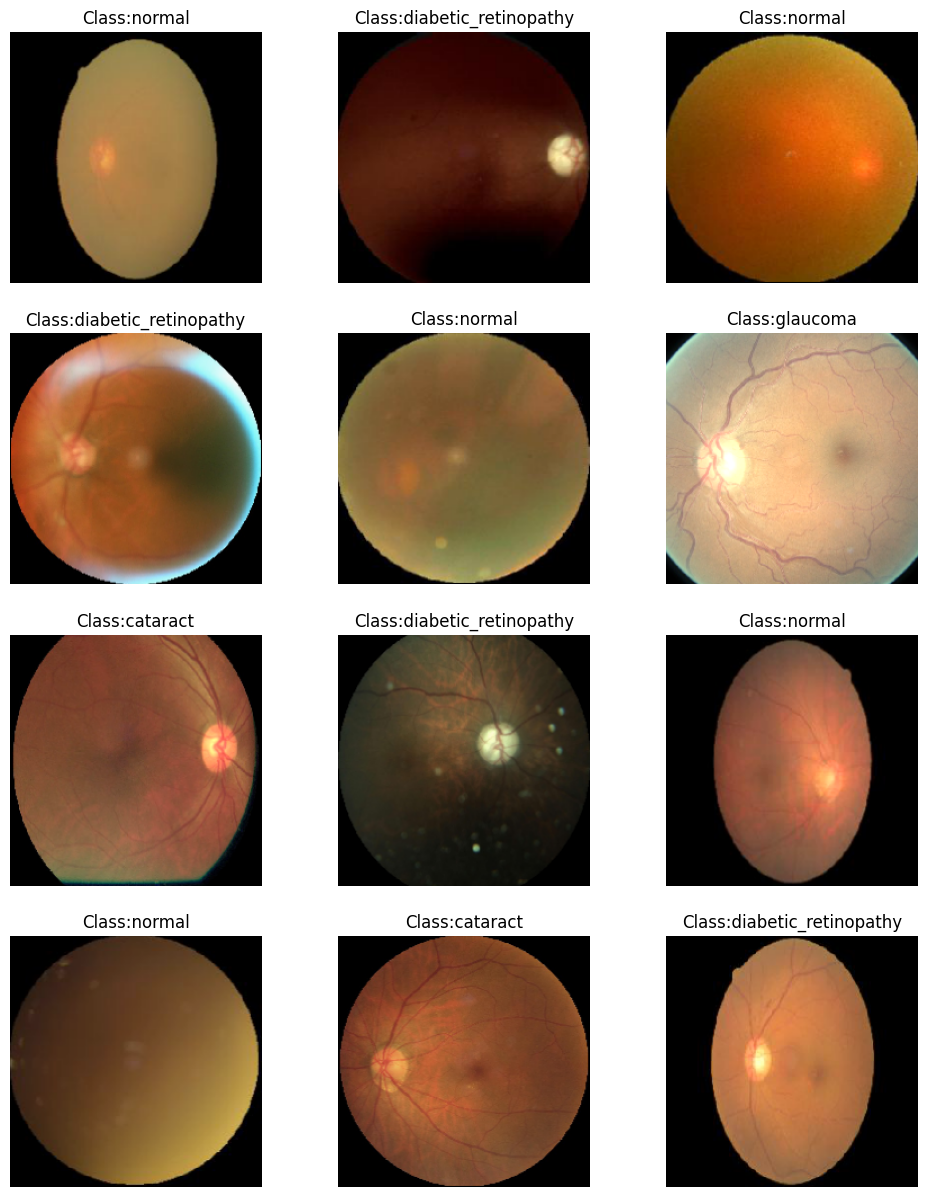

In [ ]:
WORK_DIR = '/content/drive/My Drive/Dataset/'

CLASSES = [ 'normal',
            'glaucoma',
            'diabetic_retinopathy',
            'cataract'
           ]

IMG=224

IMAGE_SIZE = [224, 224]
DIM = (IMG,IMG )

model_acc={}
model_val_acc={}



ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=4237, shuffle=True)


from random import randint
   
# get image lables
labels =dict(zip([0,1,2,3], CLASSES))
# get a batch of images
train_data, train_labels = train_data_gen.next()
    
# display a grid of 9 images
plt.figure(figsize=(12, 15))
for i in range(12):
  ax = plt.subplot(4, 3, i + 1)
  idx = randint(0,4237)
  plt.imshow(train_data[idx])
  plt.axis("off")
  plt.title("Class:{}".format(labels[np.argmax(train_labels[idx])]))


print(train_data.shape, train_labels.shape)


train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)


In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
baseModel.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
from keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Define the number of classes
NUM_CLASSES = 4

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dropout(0.2)(headModel)
headModel = Dense(NUM_CLASSES, activation="softmax")(headModel)

In [ ]:
# Create the model
from tensorflow.keras.models import Model
model_1 = Model(inputs=baseModel.input, outputs=headModel)


# Set the pre-trained layers to be non-trainable
for layer in baseModel.layers:
    layer.trainable = False

# Define the optimizer, loss function and metrics to be used
optimizer = Adam(lr=1e-4, decay=1e-4 / 20)
loss = CategoricalCrossentropy()
metrics = ["acc"]

# Compile the model
model_1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Print the model summary
model_1.summary()


#Defining other parameters for our CNN model
model_1.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=["acc"])

model_1.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_3_bn (BatchNormal  (None, 28, 28, 512)  2048       ['conv3_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_add (Add)         (None, 28, 28, 512)  0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_bn[0][0]']      
                                                                                                  
 conv3_block2_out (Activation)  (None, 28, 28, 512)  0           ['conv3_block2_add[0][0]']       
                                                                                                  
 conv3_blo

In [ ]:
EPOCHS = 20
history1 = model_1.fit(train_data, train_labels, validation_data=(test_data, test_labels),batch_size=32, epochs=EPOCHS)


Epoch 1/20
106/106 [==============================] - 30s 151ms/step - loss: 1.4107 - acc: 0.2529 - val_loss: 1.3826 - val_acc: 0.2583
Epoch 2/20
106/106 [==============================] - 13s 120ms/step - loss: 1.3909 - acc: 0.2541 - val_loss: 1.3839 - val_acc: 0.2583
Epoch 3/20
106/106 [==============================] - 13s 119ms/step - loss: 1.3856 - acc: 0.2555 - val_loss: 1.3788 - val_acc: 0.2583
Epoch 4/20
106/106 [==============================] - 13s 121ms/step - loss: 1.3816 - acc: 0.2768 - val_loss: 1.3679 - val_acc: 0.4151
Epoch 5/20
106/106 [==============================] - 13s 121ms/step - loss: 1.3736 - acc: 0.2839 - val_loss: 1.3451 - val_acc: 0.4116
Epoch 6/20
106/106 [==============================] - 13s 123ms/step - loss: 1.3503 - acc: 0.3323 - val_loss: 1.3204 - val_acc: 0.4304
Epoch 7/20
106/106 [==============================] - 13s 123ms/step - loss: 1.3342 - acc: 0.3505 - val_loss: 1.2871 - val_acc: 0.3927
Epoch 8/20
106/106 [==============================] - 1

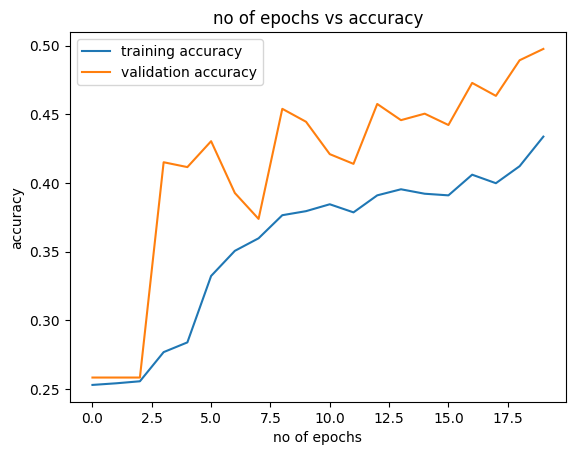

In [ ]:
acc=history1.history['acc']  ##getting  accuracy of each epochs
epochs_=range(0,EPOCHS)    
plt.plot(epochs_,acc,label='training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=history1.history['val_acc']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation accuracy")
plt.title("no of epochs vs accuracy")
plt.legend()

In [ ]:
Train_acc1=history1.history['acc'][-1]
Val_acc1=history1.history['val_acc'][-1]

model_acc["MobileNet"]=Train_acc1
model_val_acc["MobileNet"]=Val_acc1
print("Train accuracy",Train_acc1)
print("Validation accuracy",Val_acc1)

Train accuracy 0.4337562620639801
Validation accuracy 0.49764150381088257


Text(0, 0.5, 'loss')

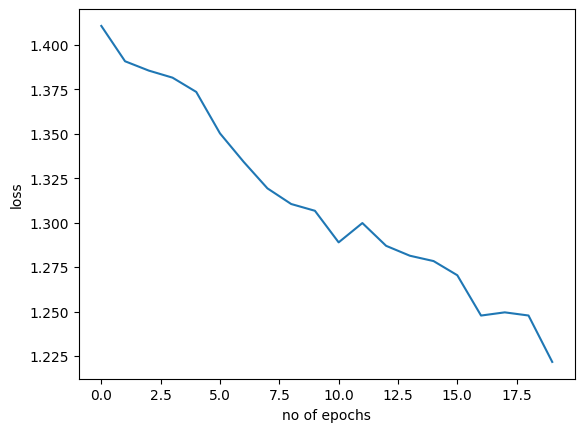

In [ ]:
acc=history1.history['loss']  ##getting  accuracy of each epochs
epochs_=range(0,EPOCHS)    
plt.plot(epochs_,acc,label='training loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')

[INFO] evaluating network...
27/27 [==============================] - 4s 92ms/step


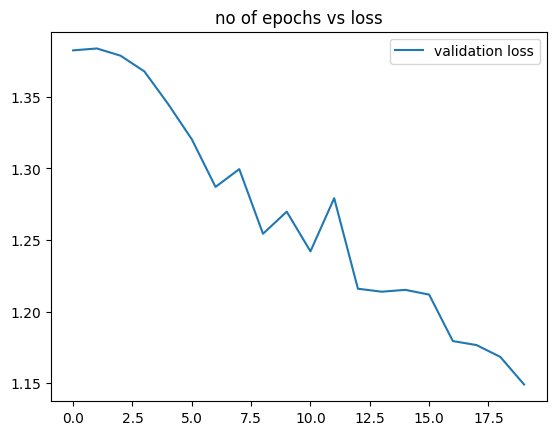

In [ ]:
acc_val=history1.history['val_loss']  ##getting validation accuracy of each epochs
plt.plot(epochs_,acc_val,label="validation loss")
plt.title("no of epochs vs loss")
plt.legend()

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs1 = model_1.predict(test_data, batch_size=32)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# assume test_labels is a 2D array of shape (num_samples, num_classes)
# convert it to a 1D array of categorical labels
le = LabelEncoder()
test_labels_cat = le.fit_transform(test_labels.argmax(axis=1))

# assume predIdxs1 is a 2D array of predicted probabilities
# compute the predicted labels as a 1D array
pred_labels = predIdxs1.argmax(axis=1)

# print the classification report
print(classification_report(test_labels_cat, pred_labels))


              precision    recall  f1-score   support

           0       0.48      0.61      0.53       188
           1       0.66      0.66      0.66       245
           2       0.00      0.00      0.00       196
           3       0.40      0.66      0.50       219

    accuracy                           0.50       848
   macro avg       0.39      0.48      0.42       848
weighted avg       0.40      0.50      0.44       848

